<a href="https://colab.research.google.com/github/sridevi0323/Animal-Hide---DL/blob/main/InceptionNet_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

# Specify the path to your desired directory
path_to_directory = '/content/drive/MyDrive/Leather_Dataset'

# Change the working directory to the specified path
os.chdir(path_to_directory)

In [ ]:
pip install scikit-learn


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense, Dropout, Concatenate
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Set the paths to your dataset folders
train_data_dir = '/content/drive/MyDrive/Leather_Dataset'
test_data_dir = '/content/drive/MyDrive/Leather_Dataset'

input_shape = (224, 224, 3)  # Input shape for Inception network
batch_size = 32
epochs = 20
learning_rate = 0.001
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='binary'
)

Found 1200 images belonging to 2 classes.
Found 1200 images belonging to 2 classes.


In [ ]:
def create_inception_model(input_shape):
    input_layer = Input(shape=input_shape)

    # You can customize the Inception architecture here
    x = Conv2D(64, (1, 1), padding='same', activation='relu')(input_layer)
    # Add more convolutional and inception modules as needed

    x = Flatten()(x)
    x = Dense(32, activation='relu')(x)
    x = Dropout(0.5)(x)
    output_layer = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=input_layer, outputs=output_layer)
    return model

model = create_inception_model(input_shape)
model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])



Epoch 1/20
37/37 [==============================] - 194s 5s/step - loss: 8.8958 - accuracy: 0.5291 - val_loss: 0.6931 - val_accuracy: 0.5034
Epoch 2/20
37/37 [==============================] - 137s 4s/step - loss: 0.6933 - accuracy: 0.4683 - val_loss: 0.6932 - val_accuracy: 0.4983
Epoch 3/20
37/37 [==============================] - 160s 4s/step - loss: 0.6932 - accuracy: 0.4940 - val_loss: 0.6932 - val_accuracy: 0.4983
Epoch 4/20
37/37 [==============================] - 140s 4s/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5008
Epoch 5/20
37/37 [==============================] - 139s 4s/step - loss: 0.6932 - accuracy: 0.5017 - val_loss: 0.6932 - val_accuracy: 0.4983
Epoch 6/20
37/37 [==============================] - 145s 4s/step - loss: 0.6932 - accuracy: 0.5017 - val_loss: 0.6931 - val_accuracy: 0.5008
Epoch 7/20
37/37 [==============================] - 145s 4s/step - loss: 0.6932 - accuracy: 0.4829 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 8/20
37

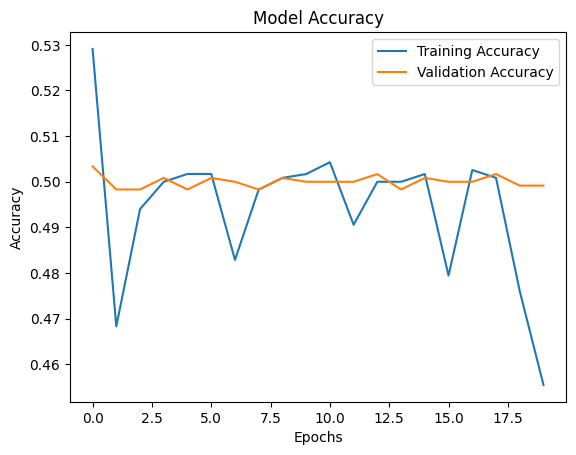

In [ ]:
# Training history
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.   // batch_size
)
# Plot the accuracy graph
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()
